# Roadmap
$\text{Multineuron Timeseries: } (T * B) \times N$  
$\;\;\;\;\;\downarrow \text{Z-Score (Neurons)}$  
$\;\;\;\;\;\downarrow PCA$  
$\text{PCA Scores: } (T * B) \times N \xrightarrow{\text{reshape}} \text{Relative Response: } T \times (N * B)$  
$\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\; \downarrow{\frac{\Sigma{\text{ (columns: T)}}} {\text{T in E}}} $  
$\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\; PSTH $  
<br>
$\text{T = trials | N = neurons | B = bins | E = events}$

# Goal
* Format the data into the multineuron timeseries format
* Perform PCA on the neural data and extract out the scores
  * Reshape scores back into PCA
  * Run classification on first 4 principal components

# Principal Component Analysis (PCA)
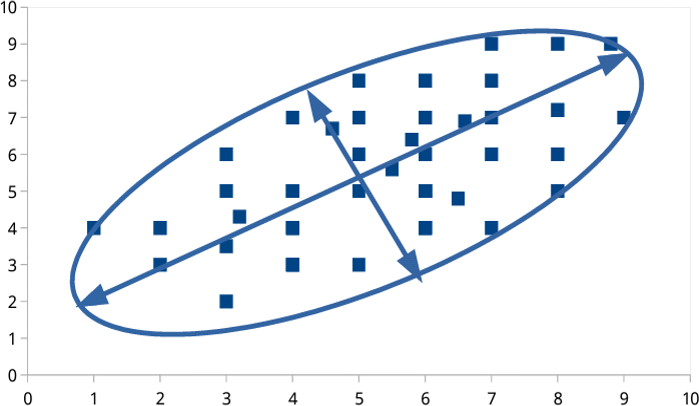

# PCA Continued
1. Calculate covariance matrix
  * diagonal = variance
  * off-diagonal = covariance
2. Use Singular Value Decomposition (SVD) on covariance matrix
  * SVD is an eigendecomposition algorithm and gives the eigenvalues and eigenvectors of the matrix
3. Use eigenvalues and eigenvectors to transform data into PC space
4. Done!

# Psuedocode
```py
# Create MNTS from scratch
# Go through neurons
for curr_neuron in neurons:
    neuron_spiketimes = data['neurons'][curr_neuron]
```

```py
# Go through trials
    for trial in events:
        spike_offset_ts = neuron_spiketimes - trial
        response = histogram(spike_offset, event_window)
        # store into MNTS format (T * B) X N
```

```py
# after getting MNTS format
z_mnts = zscore(mnts)
pca(z_mnts)
# Reshape pca results from MNTS -> PSTH
# Remember that its organized by trials so you need to keep track how they are organized so that you can split up the events
psth = reshape(mnts)
```

# PsuedoCode
```py
# alternative solution
relative_response = create_relative_response(neurons, events)
# Since MNTS format contains same info as PSTH, you can reshape the matrix as well
mnts = reshape(relative_response)
z_mnts = zscore(mnts)
pca(z_mnts)
psth = reshape(mnts)
```

# What to turn in
## Conceptual Questions (10pts)
* pdf with answers to conceptual questions
* Code files you wrote to create JSON output file
* Code files should be plain text with proper file extension
  * ex: last_first_hw4.m, last_first_hw4.py, etc.

# Json Output File (10pts)
* This file will be input into automatic grader
* This was taken from the example solution json and is a small snippet
* You are not required to turn in a pretty formatted json file
```json
{
    "psth_classifier": {
        "mutual_info": 0.32068603931534856,
        "performance": 0.46
    }
}
```